In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')

In [6]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3808,5,68.666667,0,0.0,11,126.500,0.015476,0.032292,0.000000,0.0,May,2,2,4,2,Returning_Visitor,False,False
11734,0,0.000000,0,0.0,9,171.500,0.000000,0.022222,0.000000,0.0,Nov,2,2,2,13,Returning_Visitor,False,False
2955,0,0.000000,0,0.0,7,384.500,0.000000,0.028571,0.000000,0.0,May,2,4,1,5,Returning_Visitor,False,False
9879,1,16.000000,0,0.0,44,2939.625,0.000000,0.002222,32.812057,0.0,Nov,2,2,8,2,Returning_Visitor,False,True
2097,0,0.000000,0,0.0,1,0.000,0.200000,0.200000,0.000000,0.0,May,1,1,1,3,Returning_Visitor,False,False


# EDA

## Descriptive Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

A : Pada bagian OperatingSystem, Browser, Region, dan TrafficType menggunakan tipe data integer yang tidak diketahui pilihan 1,2,3,... seharusnya menggunakan tipe data string dan diberikan sebuah nama (Contoh : Pada kolom Browser = Angka 1 direpresentasikan menjadi Google, dan lain sebagainya), Pada bagian ProductRelated_Duration dan Administrative_Duration tidak diketahui itu dalam satuan apa? (second, minute, hour) dikarenakan kurangnya informasi daripada data tersebut, karena pada data tersebut menjelaskan bahwa user sedang membuka halaman yang saat ini berapa lama (satuan waktu).

B : Tidak ada record yang kosong

C : Tidak ada summary yang aneh

In [9]:
df = df.astype({'OperatingSystems': object, 'Browser': object, 'Region': object, 'TrafficType': object})

nums   = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
#timestamps   = ['Month']

In [10]:
df[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [11]:
df[cats].astype('category').describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


## Value Counting

In [12]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Value count kolom OperatingSystems:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Value count kolom Browser:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Value count kolom Region:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Value count kolom TrafficType:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

Value count kolom VisitorType:
Return

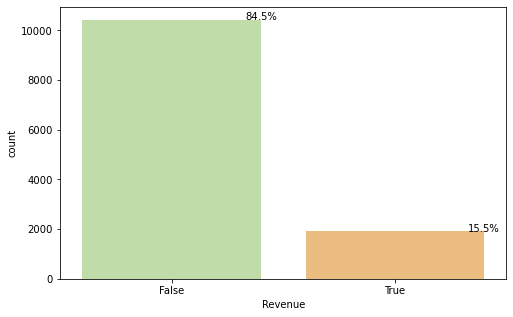

In [13]:
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x='Revenue', data=df, palette='Spectral_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Univariate Analysis

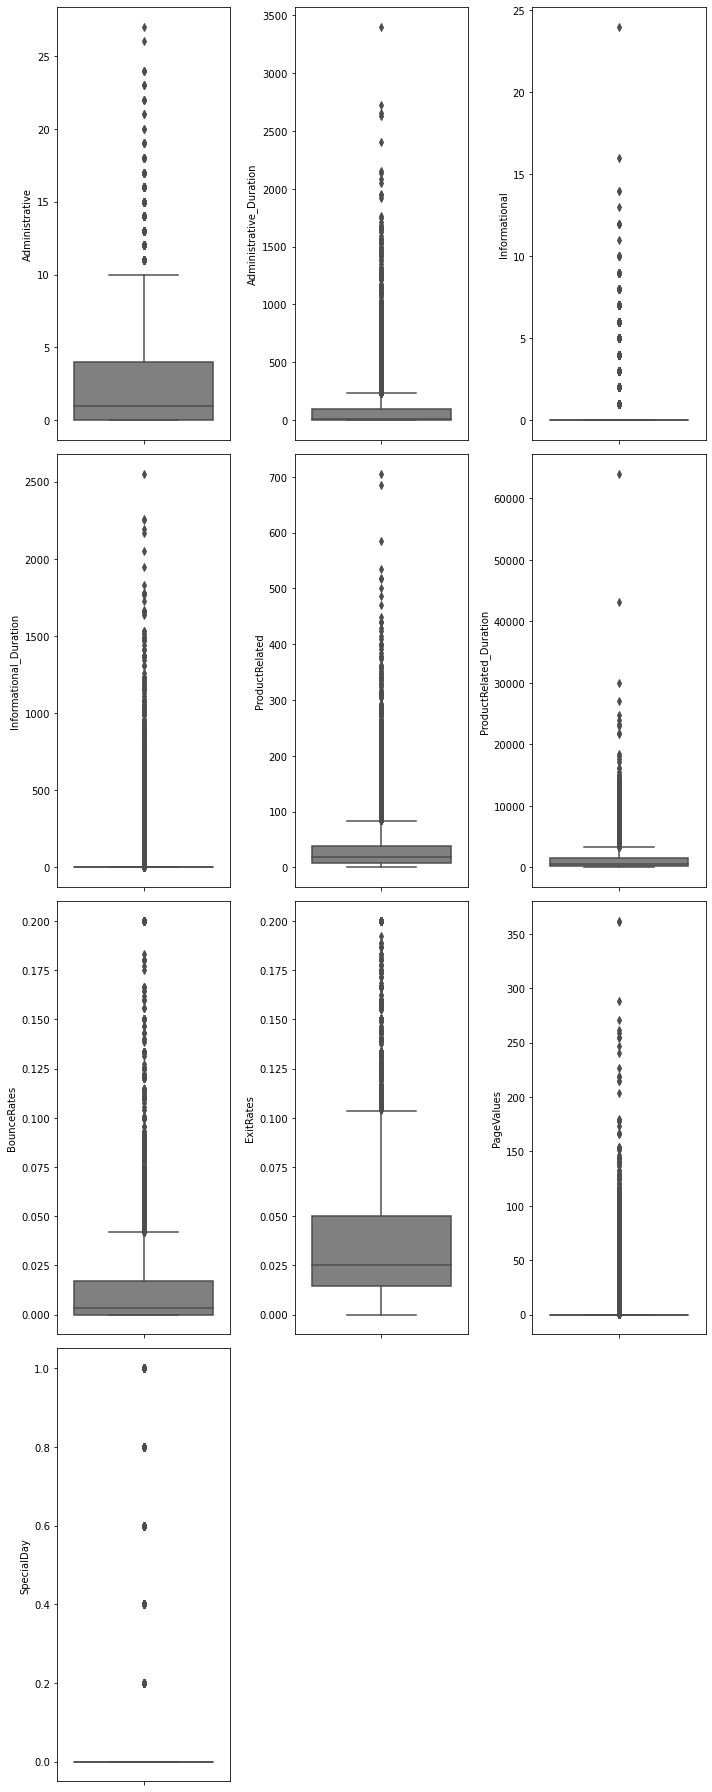

In [14]:
plt.figure(figsize=(10,25))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Dari boxplot diatas dapat disimpulkan bahwa semua kolom numerik memiliki outlier yg extreme, karena terdapat titik (data) yang sangat jauh dari batas outlier. Untuk kedepannya, pada saat melakukan data preprocessing tidak akan ada data yang dihilangkan, karena outlier pada data numerik diatas masih wajar (Diasumsikan tidak ada kesalahan input pada data).

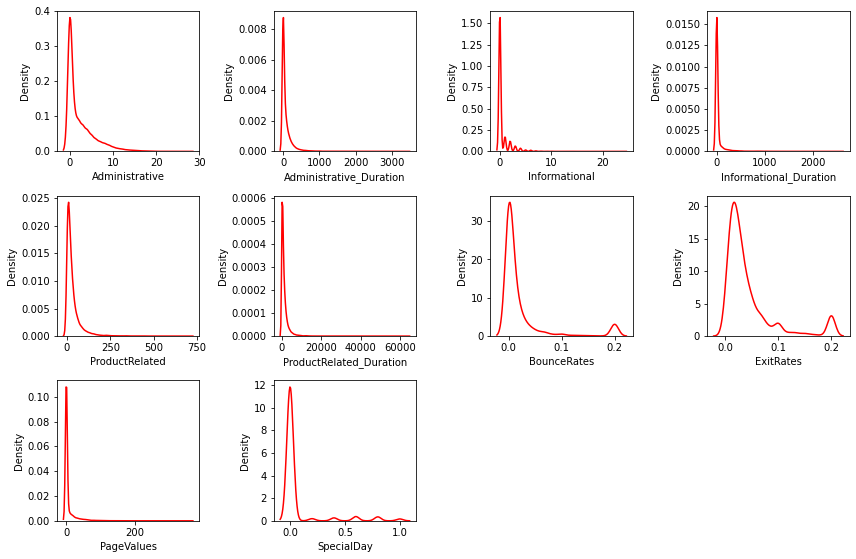

In [15]:
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[nums[i]], color='red')
    plt.xlabel(nums[i])
    plt.tight_layout()

Dari semua kolom numerik yang sudah plotkan diatas dapat disimpulkan bahwa hampir semuanya berdistribusi positively skewed karena plot cenderung memiliki ekor ke kanan, dan median < mean. Untuk kolom Informational, Informational_Duration, PageValues dan SpecialDay tidak memiliki distribusi karena datanya tidak merata dan datanya banyak berada di angka 0. Hampir dari semua kolom didominasi oleh angka 0, kecuali untuk kolom ProductRelated data didominasi oleh angka 1 dan ExitRates datanya didominasi oleh angka 0.2. Lalu pada grafik juga tidak terdapat bimodal maupun multimodal, karena modus pada grafik dan data hanya berada pada 1 titik saja.

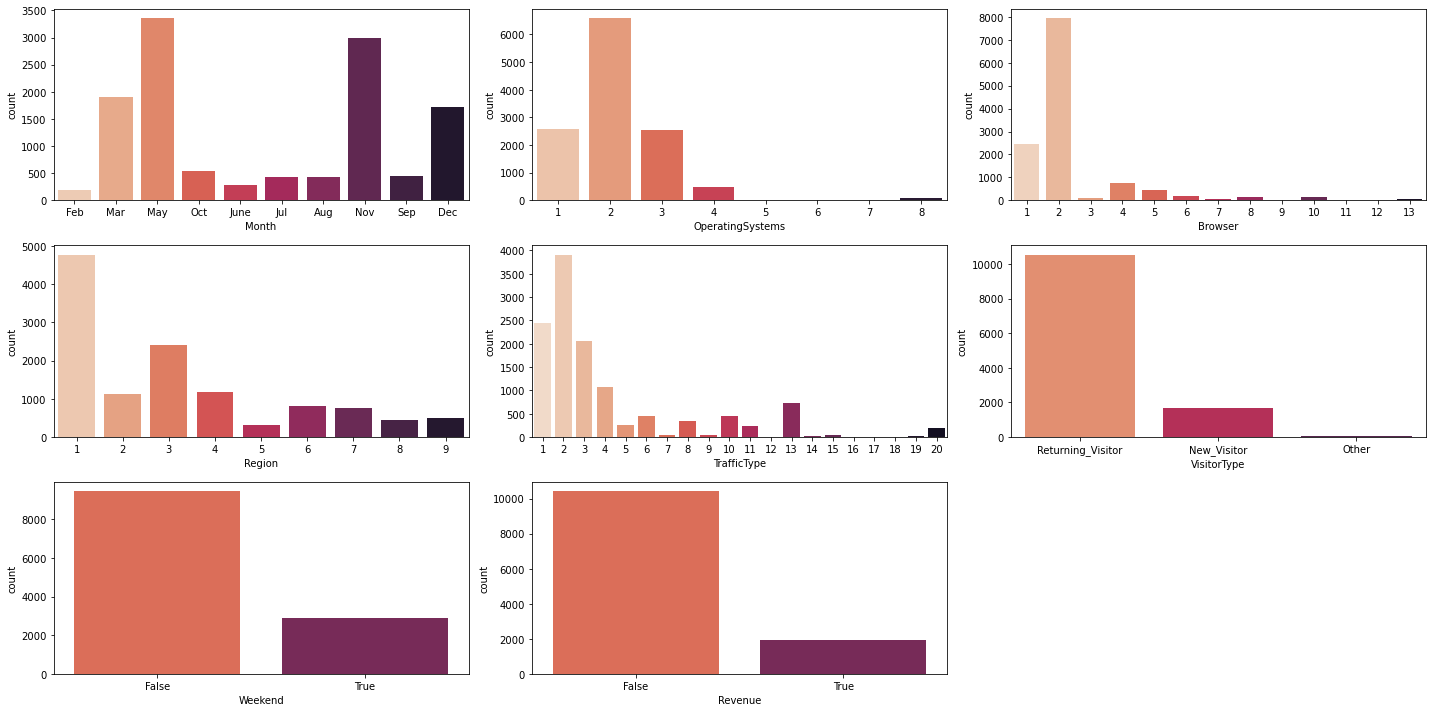

In [16]:
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], palette='rocket_r', orient='v')
    plt.tight_layout()

1. Region yang paling banyak berkunjung di website berasal dari region 1.
2. OperatingSystems dan Browser nomer 2 yang paling sering digunakan.
3. Bulan paling banyak kunjungan terjadi pada bulai Mei.
4. TrafficType 2 yang paling umum.
5. Returning_Visitor paling banyak.
6. Weekday mendominasi dibandingkan Weekend.
7. Revenue memiliki nilai yang kecil dibandingkan yang tidak menghasilkan revenue.

## Multivariate Analysis 

In [17]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,-0.016767,-0.082305


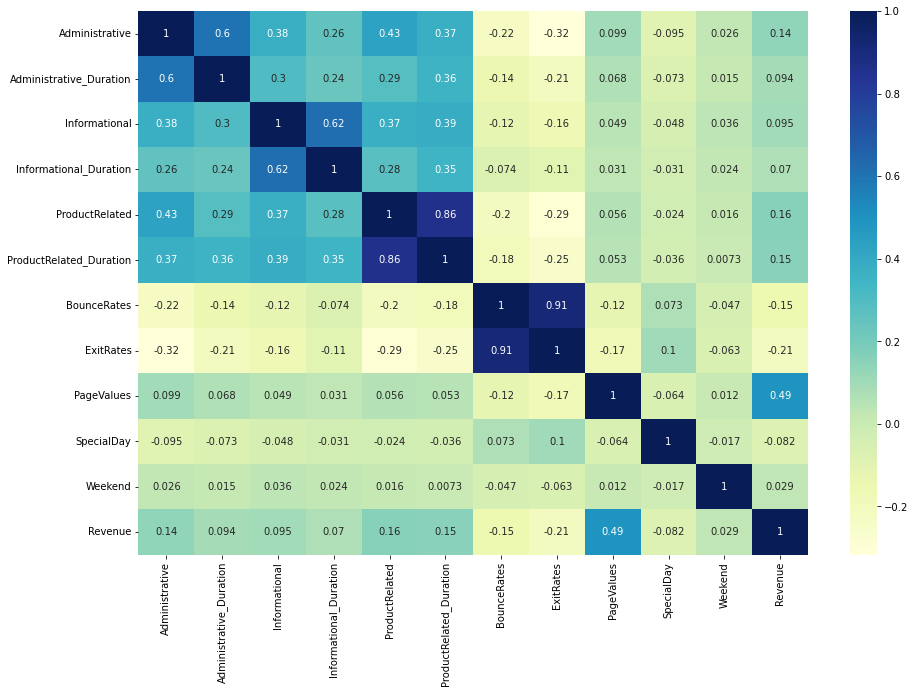

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

Korelasi berkisar dari -1 hingga +1. Nilai yg mendekati 0 berarti memiliki kecenderungan tdk ada hubungan linear antar variabel. Semakin dekat dengan +1, artinya ketika 1 variabel meningkat variabel yang lain juga meningkat. Semakin dekat dengan -1, artinya ketika 1 variabel meningkat variabel yg lain menurun. Korelasi positif yang paling besar didapat BouceRates dan ExitRates sebesar 0.91. Maknanya, semakin besar BounceRates semakin tinggi juga ExitRatesnya. Korelasi negatif paling tinggi ditunjukkan pada SpecialDay dan Revenue sebesar -0.082.

* Bounce Rate dan Exit Rate memiliki korelasi yang lemah terhadap feature target (Revenue)
* Page Value memiliki hubungan korelasi positif yang cukup kuat terhadap Revenue
* Administrative, Product Related dan Produk Related Duration memiliki hubungan yang korelasi yang lemah terhadap Revenue. Sedangkan Product Related dan Product Related Duration memiliki hubungan positif korelasi yang kuat satu sama lain

<Figure size 1440x1440 with 0 Axes>

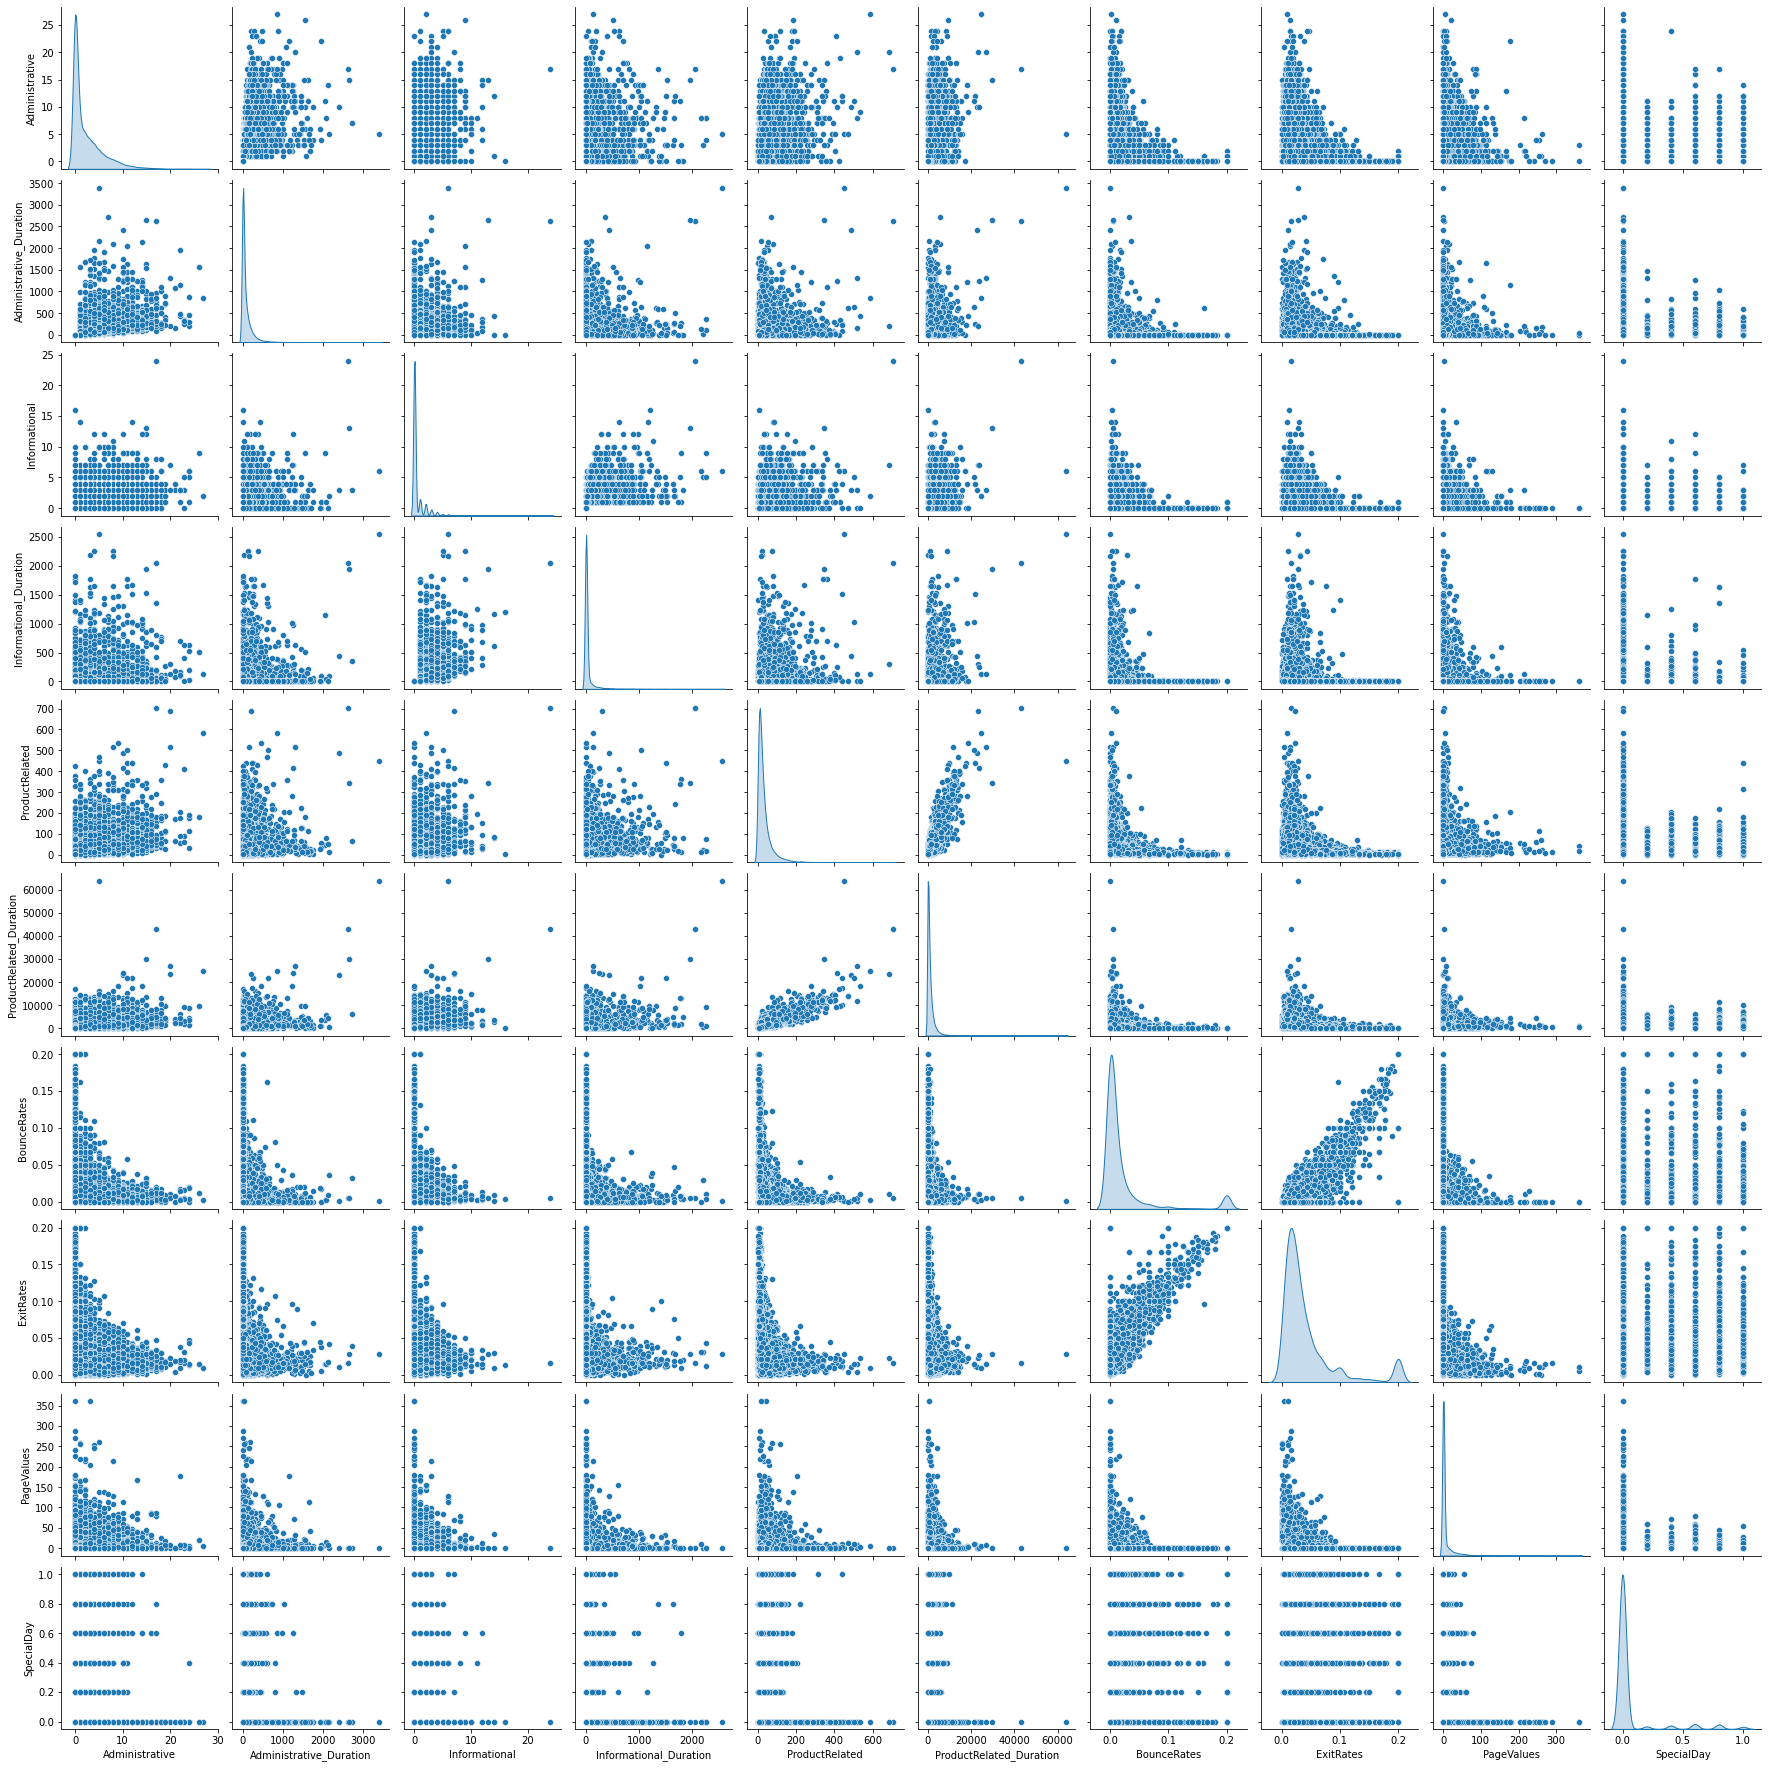

In [19]:
plt.figure(figsize=(20, 20))
sns.pairplot(df[nums], diag_kind='kde')

* Feature Bounces rate dan Exit rates memiliki korelasi yang paling kuat diantara variabel lain nya maka menunjukkan semakin banyak bounces rates maka semakin tinggi juga nilai Exit Rates nya
* Feature Informational dan Informational Duration memiliki korelasi yang kuat maka menunjukkan semakin banyak User yang memasuki halaman informasi maka semakin tinggi juga nilai Informational Duration nya
* Korelasi yang lemah terdapat di fitur Revenue dan Special day

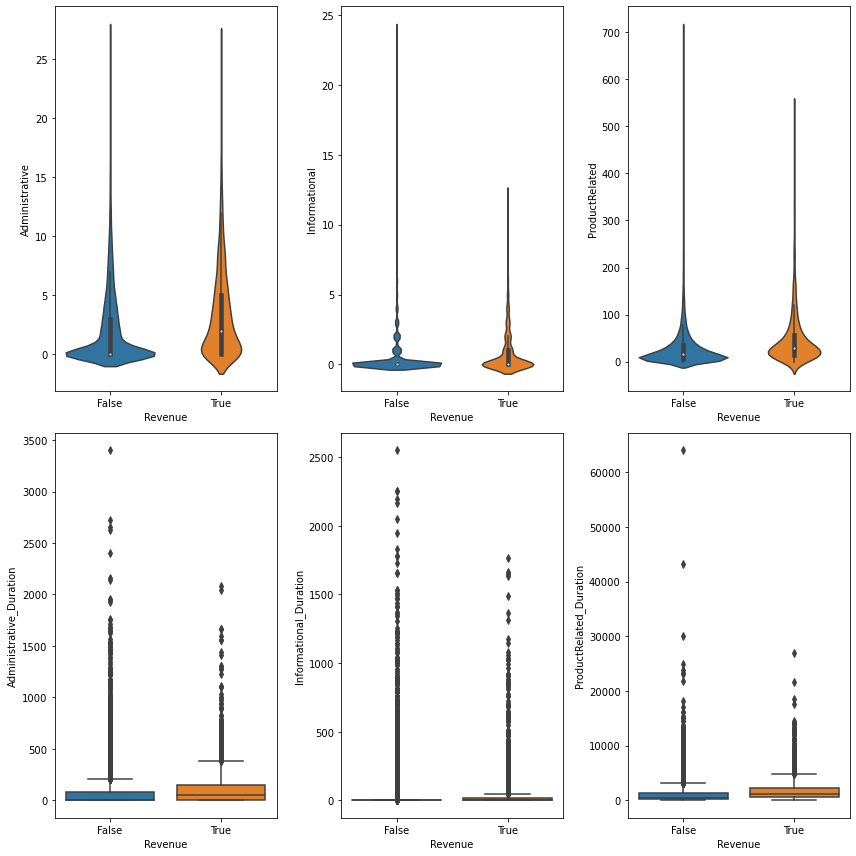

In [20]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

1. Secara umum, pengunjung cenderung mengunjungi lebih sedikit halaman, dan menghabiskan lebih sedikit waktu, jika mereka tidak akan melakukan pembelian.

2. Pengunjung website mengunjungi halaman web product related lebih banyak dibandingkan dengan halaman administratif dan information.

3. Pengunjung yang menghasilkan revenue cenderung lebih lama mengakses halaman web product related.

4. 3 feature pertama memiliki distribusi normal

**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?**
* Berdasarkan analisis korelasi semua kolom numerik dan kategorikal memiliki korelasi ke target kecuali feature `region`. Berikut ini adalah 3 feature dari masing-masing tipe kolom yang paling tinggi nilai korelasi terhadap target.
    * Numerik: `page_values`, `exit_rates`, dan `product_related_duration`
    * Kategorikal: `month`, `traffic_type`, dan `visitor_type`

**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?**

* Berdasarkan spearman's correlation yang ditunjukkan oleh heatmap, ada korelasi antar feature numerik yang significant di atas 0.8 yaitu kolom jumlah page dan jumlah durasi page memiliki korelasi yang tinggi yaitu 0.88 - 0.95.

* Karena terdapat korelasi tinggi antar feature numerik dan ada feature kategorikal yang tidak berkorelasi ke label maka 
  * Salah satu dari pasangan kolom numerik yang berkorelasi tinggi harus didrop
  * Kolom region bisa didrop

### Page Metrics Analysis

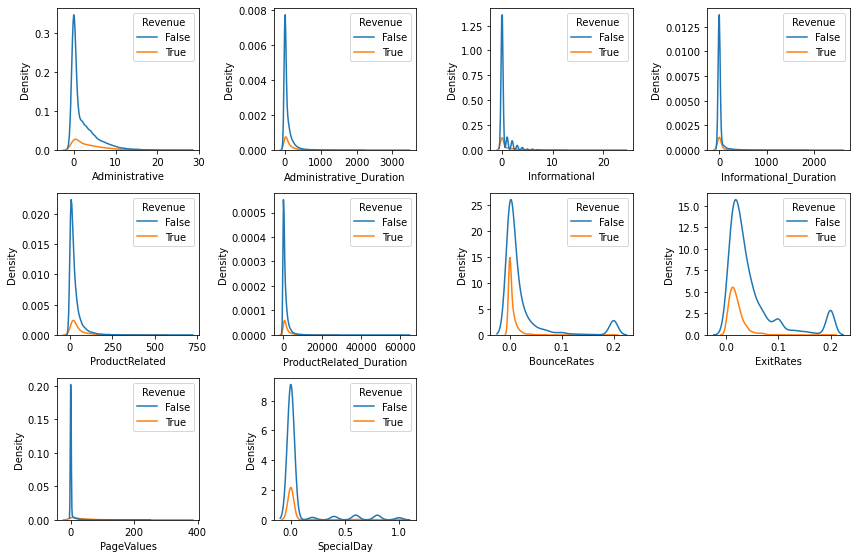

In [21]:
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[nums[i]], hue=df['Revenue'])
    plt.xlabel(nums[i])
    plt.tight_layout()

* BounceRates & PageValues tidak mengikuti distribusi normal.
* Semua fitur memiliki distribusi positif skew
* Semua distribusi memiliki banyak outliers
* Rata rata Bouncerate dan exit rate memiliki data point yang rendah
* Exit rate memiliki nilai yang lebih tinggi daripada bounce rate, di mana halaman konfirmasi transaksi misalnya akan menyebabkan rata-rata exit rate meningkat.
* Pada kolom exit_rates terlihat untuk jumlah sesi yang menghasilkan revenue, nilai exit_rates cenderung rendah dengan data terbanyak tersebar di rentang 0 - 0.05.
* Sedangkan pada bounce_rates, jumlah sesi yang menghasilkan revenue cukup signifikan di rentang 0.00 - 0.01.
* Pada kolom page_values, di rentang 0 - 100, jumlah sesi yang menghasil revenue cukup tinggi.


### Visitor Analysis

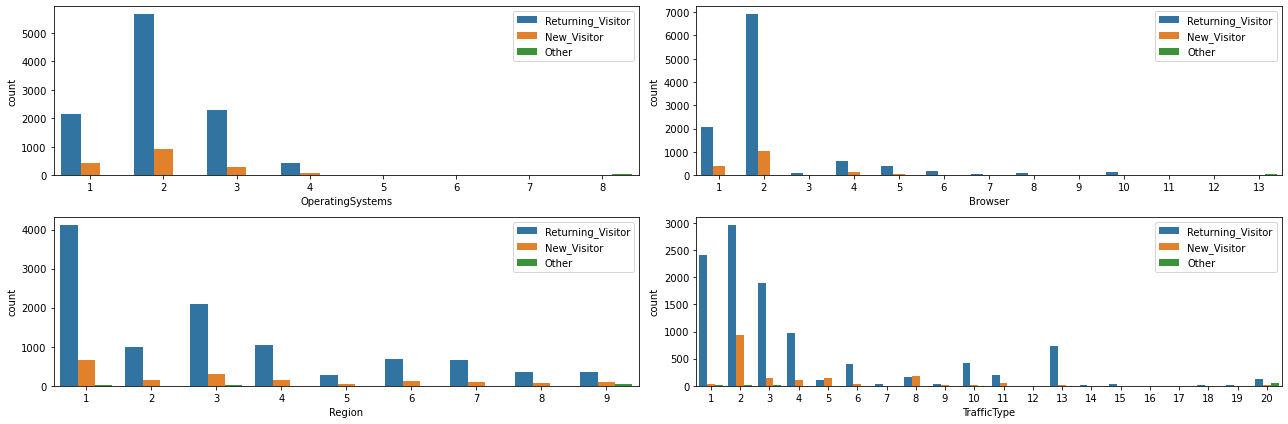

In [22]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

* 1 dari sistem operasi memiliki returning visitor ~7000 dalam suatu kumpulan data
* 4 dari 8 sistem operasi yang digunakan, bertanggung jawab atas sejumlah kecil (<200) new visitor dalam suatu kumpulan data.
* Browser yang digunakan oleh pengunjung, di mana ada 1 browser dominan, 3 dengan representasi yang layak di dataset, dan sisanya jarang digunakan.
* Selain itu, sumber traffic type sangat beragam, dengan beberapa yang tidak berkontribusi banyak pada kumpulan data.

### Feature Categorical vs Revenue

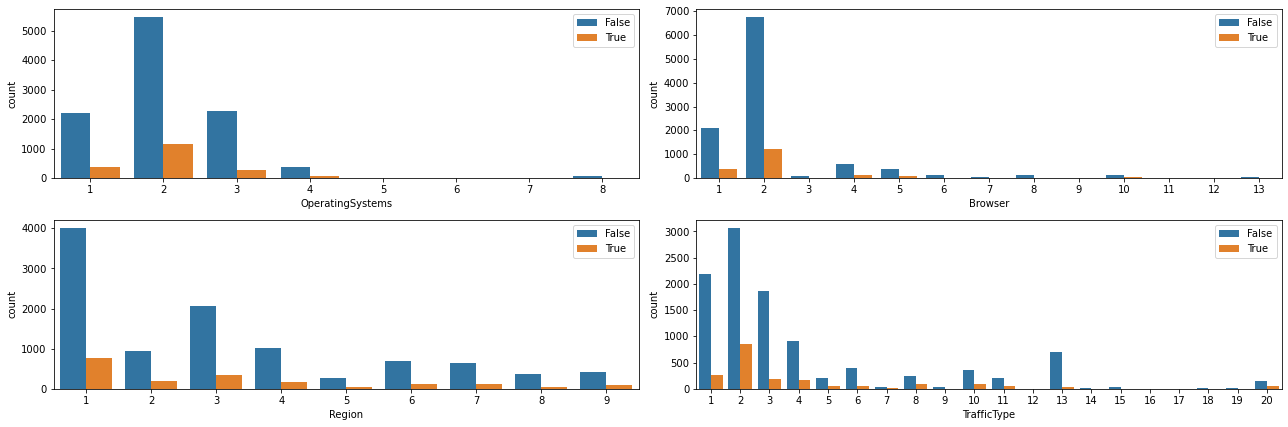

In [23]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='Revenue', ax=ax1)
sns.countplot(data=df, x='Browser', hue='Revenue', ax=ax2)
sns.countplot(data=df, x='Region', hue='Revenue', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='Revenue', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

* Pengunjung website yang menghasilkan revenue mayoritas menggunakan browser dan OS tipe 2.
* Sumber traffic yang paling banyak menghasilkan revenue adalah traffic type 2.

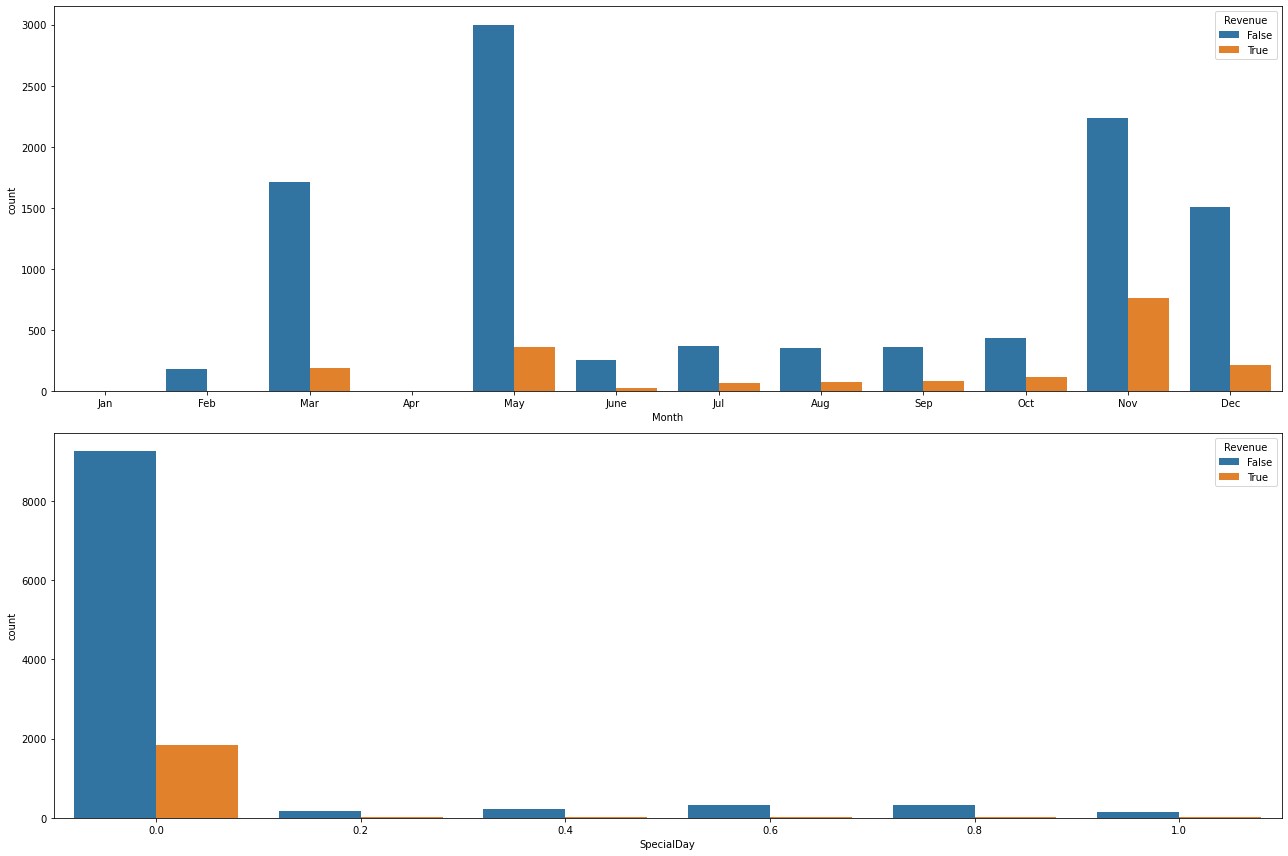

In [24]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

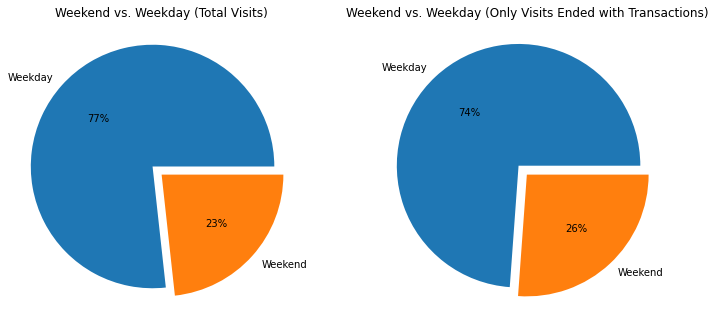

In [25]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

* Pada bulan Maret dan Mei, memiliki banyak pengunjung, dimana Mei adalah bulan dengan jumlah kunjungan terbanyak, namun transaksi yang dilakukan selama 2 bulan tersebut tidak berada pada level yang sama
* Januari dan April tidak memiliki kunjungan sama sekali
* Sebagian besar transaksi terjadi selama akhir tahun, Nov sebagai bulan dengan jumlah transaksi terkonfirmasi tertinggi.
* Semakin dekat tanggal kunjungan ke hari khusus (seperti hari raya, tahun baru, ... dll) semakin besar kemungkinan pengunjung melakukan transaksi.
* Sebagian besar transaksi terjadi pada hari spesial (SpecialDay =0).
* Akhir pekan tidak banyak mempengaruhi jumlah kunjungan atau transaksi, hanya terlihat sedikit peningkatan jumlah transaksi yang terjadi pada akhir pekan dibandingkan dengan hari kerja. 

### Business Insight

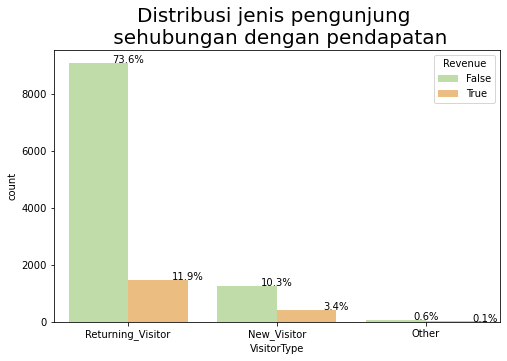

In [26]:
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x='VisitorType', hue='Revenue', data=df, palette='Spectral_r')
plt.title('Distribusi jenis pengunjung \n sehubungan dengan pendapatan', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Pengunjung didominasi pengunjung lama 'ReturningVisitor', namun angka konversi pengunjung baru 'NewVisitor' masih lebih bagus dibandingkan konversi pengunjung lama. Oleh karena itu di page 'ProdukRelated' harus ada call to actionnya supaya mempersingkat nilai 'ProdukRelated_duration' sehingga meningkatkan conversion rate. Rekomendasi : Ada baiknya kita memberikan treatment khusus pada pengunjung lama 'ReturningVisitor', seperti melacak history produk yang dilihat dan memberikan promo terkait produk yang sering dilihat. Sedangkan untuk ‘New Visitor, perusahaan dapat berlangganan iklan pada social media supaya pengguna yang belum pernah berkunjung akan tertarik untuk mengunjungi website ecommerce.

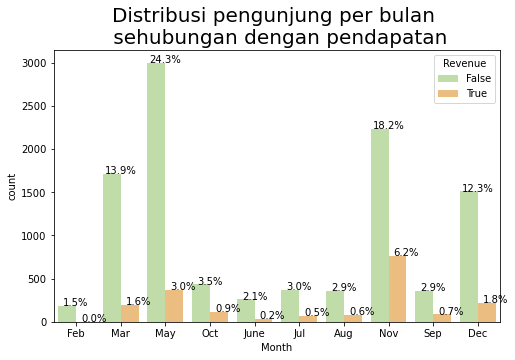

In [27]:
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x='Month', hue='Revenue', data=df, palette='Spectral_r')
plt.title('Distribusi pengunjung per bulan \n sehubungan dengan pendapatan', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Pembelian tertinggi pada bulan November. Hal ini terjadi karena adanya black Friday pada bulan November sehingga pengunjung cenderung melakukan pembelian besar-besaran. Perusahaan bisa memanfaatkan momentum ini untuk memberikan promo lebih banyak di bulan November agar pendapatan dapat ditingkatkan lagi. Pada bulan Februari, revenue ada pada 0%. Perlu adanya promo lebih seperti gratis ongkir dan cashback di valentine day.

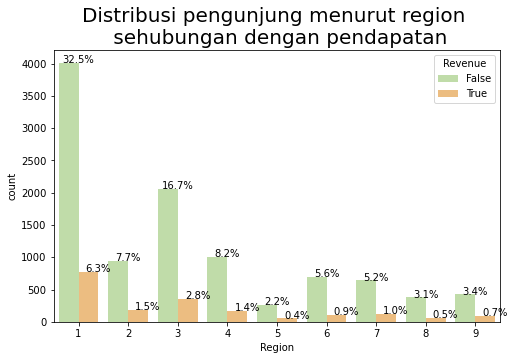

In [28]:
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x='Region', hue='Revenue', data=df, palette='Spectral_r')
plt.title('Distribusi pengunjung menurut region \n sehubungan dengan pendapatan', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

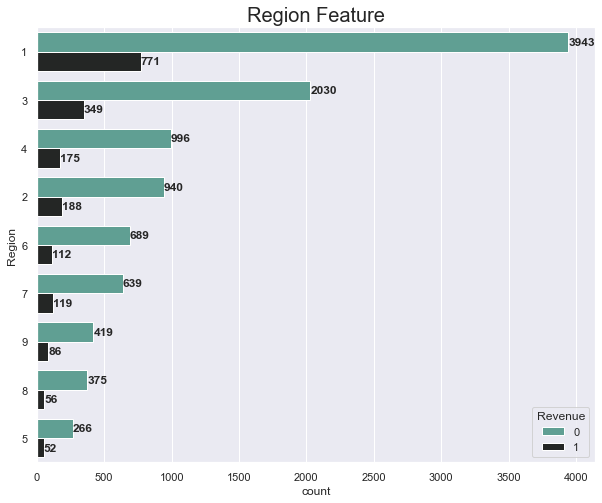

In [105]:
plt.figure(figsize=(10,8))
sns.set_theme()
ax = sns.countplot(y=df['Region'], hue=df['Revenue'], palette='dark:#5A9_r', order=df['Region'].value_counts().index)
plt.title('Region Feature', fontsize=20)
for label in ax.containers:
    ax.bar_label(label, fontweight='bold')
plt.show()

Region yang menghasilkan revenue tertinggi berada di region 1. Dari 9 region yang ada, pengunjung dari 3 region masih memiliki tingkat revenue yang sangat rendah, yaitu region 5, 8, dan 9. Perlu diberikan promo besar-besaran untuk pengunjung yang berada di region 5, 8, dan 9.

### Hypothesis Testing

In [29]:
import scipy.stats as st
from scipy.stats import chi2_contingency

In [30]:
def hyp_test(data):
  p_value = chi2_contingency(pd.crosstab(df[feature], df.Revenue))[1]
  print(f'p-value: {p_value}')

  if p_value > 0.05:
    print(f'Accept H0')
  else:
    print(f'Reject H0')

In [31]:
for feature in cats:
  print(f'Hypothesis testing {feature} - Revenue')
  hyp_test(feature)
  print('')

Hypothesis testing Month - Revenue
p-value: 2.2387855164805443e-77
Reject H0

Hypothesis testing OperatingSystems - Revenue
p-value: 1.4160941129614401e-13
Reject H0

Hypothesis testing Browser - Revenue
p-value: 0.00608754317955109
Reject H0

Hypothesis testing Region - Revenue
p-value: 0.3214249979076556
Accept H0

Hypothesis testing TrafficType - Revenue
p-value: 1.652735258160153e-67
Reject H0

Hypothesis testing VisitorType - Revenue
p-value: 4.269904152293867e-30
Reject H0

Hypothesis testing Weekend - Revenue
p-value: 0.0012663251061221968
Reject H0

Hypothesis testing Revenue - Revenue
p-value: 0.0
Reject H0



# Data Pre-Processing

## Data Cleaning

### Duplicated data

In [32]:
print(f'Jumlah row duplicated sebelum dihapus = {df.duplicated().sum()}')


df.drop_duplicates(inplace=True) 
print(f'Jumlah row duplicated SETELAH dihapus = {df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus = 125
Jumlah row duplicated SETELAH dihapus = 0


## Feature Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df['Revenue'] = LabelEncoder().fit_transform(df['Revenue'])
df['Weekend'] = LabelEncoder().fit_transform(df['Weekend'])

In [34]:
mapping_month = {'Jan' : 1, 'Feb' : 2, 'Mar' : 3, 'Apr' : 4, 'May' : 5, 'June' : 6, 'Jul' : 7, 'Aug' : 8, 'Sep' : 9, 'Oct' : 10,
                 'Nov' : 11, 'Dec' : 12}

df['Month'] = df['Month'].map(mapping_month)

In [35]:
onehot = pd.get_dummies(df['VisitorType'], prefix = 'VT')
df = df.join(onehot)

df = df.drop(['VisitorType'], axis = 1)

In [36]:
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType           

## Feature Engineering

<AxesSubplot:>

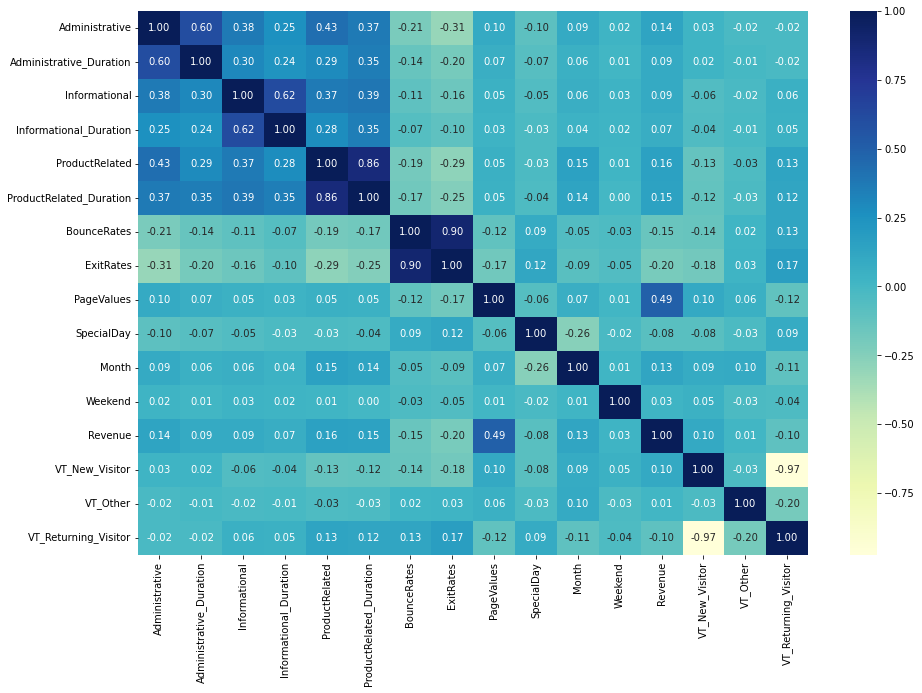

In [37]:
# numeric correlation
plt.figure(figsize=(15 , 10))
sns.heatmap(df_clean.corr(), cmap = 'YlGnBu', annot = True, fmt = '.2f')

### Feature Selection

In [38]:
df_select = df_clean.drop(['BounceRates', 'VT_Returning_Visitor', 'Region'], axis=1)
df_select.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,1,1,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0.0,2,2,2,2,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,4,1,3,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0.0,2,3,2,4,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,0.0,2,3,3,4,1,0,0,0


### Feature Transformation

In [39]:
df_select['Administrative_Duration_Page'] = df_select['Administrative_Duration']/df_select['Administrative']
df_select['Informational_Duration_Page'] = df_select['Informational_Duration']/df_select['Informational']
df_select['ProductRelated_Duration_Page'] = df_select['ProductRelated_Duration']/df_select['ProductRelated']

df_transform = df_select.drop(['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)


df_transform['Administrative_Duration_Page'] = df_transform['Administrative_Duration_Page'].fillna(0)
df_transform['Informational_Duration_Page'] = df_transform['Informational_Duration_Page'].fillna(0)
df_transform['ProductRelated_Duration_Page'] = df_transform['ProductRelated_Duration_Page'].fillna(0)

<AxesSubplot:>

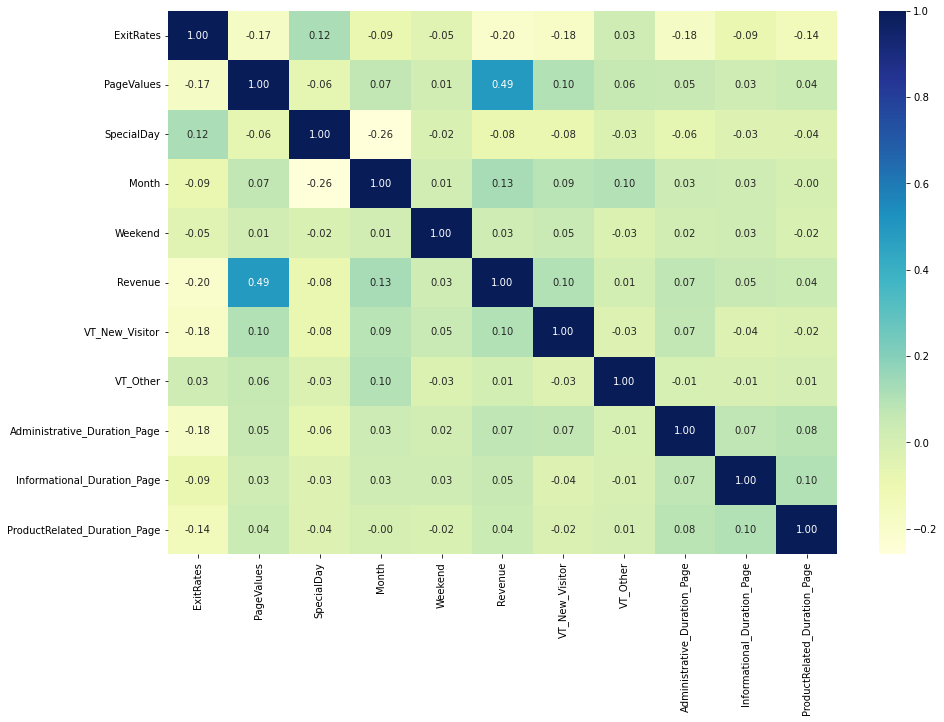

In [40]:
# numeric correlation
plt.figure(figsize=(15 , 10))
sns.heatmap(df_transform.corr(), cmap = 'YlGnBu', annot = True, fmt = '.2f')

In [41]:
df_transform.sample(5)

,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
8123,0.004762,0.000000,0.0,11,2,2,2,0,0,0,0,0.000000,0.0,32.000000
3059,0.032292,0.000000,0.0,5,2,5,2,0,0,0,0,19.142857,98.0,39.871212
1368,0.008908,6.506831,0.0,3,1,1,2,0,1,0,0,17.125000,422.5,29.863225
439,0.013333,0.000000,0.0,3,2,2,2,0,0,0,0,16.666667,0.0,61.230769
9583,0.100000,0.000000,0.0,12,4,2,3,0,0,0,0,0.000000,0.0,221.250000


In [42]:
df2 = df_transform.copy()

# Model & Evaluation

### Split data

In [43]:
# cek dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ExitRates                     12205 non-null  float64
 1   PageValues                    12205 non-null  float64
 2   SpecialDay                    12205 non-null  float64
 3   Month                         12205 non-null  int64  
 4   OperatingSystems              12205 non-null  object 
 5   Browser                       12205 non-null  object 
 6   TrafficType                   12205 non-null  object 
 7   Weekend                       12205 non-null  int64  
 8   Revenue                       12205 non-null  int64  
 9   VT_New_Visitor                12205 non-null  uint8  
 10  VT_Other                      12205 non-null  uint8  
 11  Administrative_Duration_Page  12205 non-null  float64
 12  Informational_Duration_Page   12205 non-null  float64
 13  P

In [44]:
X = df2.drop(['Revenue'], axis = 1) 
y = df2['Revenue'] 

from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# data train (X_train)
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_train = pd.DataFrame(X_train, columns = list(X.columns))

# data test (X_test)
X_test = scaler.transform(X_test_raw)
X_test = pd.DataFrame(X_test, columns = list(X.columns))

### Handling imbalance

In [46]:
y_train.value_counts(normalize = True)*100

0    84.057123
1    15.942877
Name: Revenue, dtype: float64

In [47]:
from imblearn import over_sampling

X_over_smote, y_over_smote = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(X_train, y_train)
print('AFTER oversampling (smote)')
print(pd.Series(y_over_smote).value_counts())

AFTER oversampling (smote)
0    7181
1    3590
Name: Revenue, dtype: int64


# Modeling

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_validate


def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision (Train set):%.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall (Train set):%.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 (Train set):%.2f" % f1_score(y_train, y_pred_train))
    print("F1 (Test set):%.2f" % f1_score(y_test, y_pred))

    print("ROC AUC (Train-proba): %.2f" % roc_auc_score (y_train, y_pred_proba_train[:,1]))
    print("ROC AUC (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba[:,1]))
  
    #score = cross_validate(model, X, y, cv = 5, scoring = 'roc_auc', return_train_score = True)
    #print('ROC AUC (crossval train): '+ str(score['train_score'].mean()))
    #print('ROC AUC (crossval test): '+ str(score['test_score'].mean()))
    

def show_feature_importance(model):   
    feat_importances = pd.Series(model.feature_importances_,index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(f'{model}')


def show_best_hyperparameter(model):   
    print(model.best_estimator_.get_params())

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(X_over_smote, y_over_smote) 
eval_classification(lr)

Accuracy (Train set): 0.89
Accuracy (Test set): 0.89
Precision (Train set):0.68
Precision (Test set):0.67
Recall (Train set):0.57
Recall (Test set):0.56
F1 (Train set):0.62
F1 (Test set):0.61
ROC AUC (Train-proba): 0.89
ROC AUC (Test-proba): 0.89


In [80]:
value = lr.coef_

In [81]:
names = X.columns
table = {'names': names, 'value': value}
table

{'names': Index(['ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
        'Browser', 'TrafficType', 'Weekend', 'VT_New_Visitor', 'VT_Other',
        'Administrative_Duration_Page', 'Informational_Duration_Page',
        'ProductRelated_Duration_Page'],
       dtype='object'),
 'value': array([[-9.16912451e-01,  1.98134841e+00, -1.33034924e-01,
          4.23170005e-01, -8.08631711e-02,  3.86626010e-02,
         -1.25669296e-02,  3.85136255e-02,  8.03351267e-04,
         -4.72568601e-02,  3.17091292e-02,  4.54880546e-02,
         -6.25476367e-03]])}

In [82]:
!pip install shap
import shap

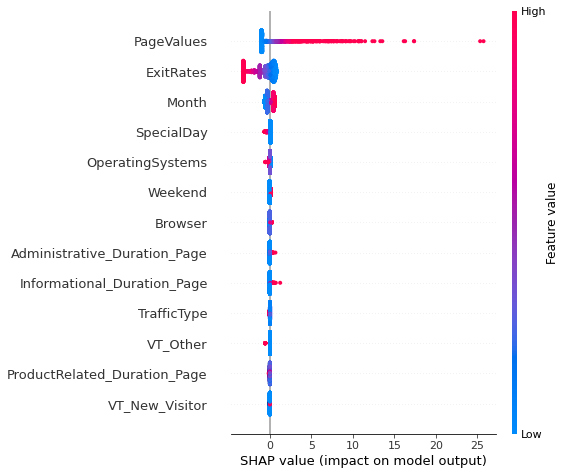

In [83]:
lr = LogisticRegression() 
lr.fit(X_over_smote, y_over_smote) 
explainer = shap.LinearExplainer(lr, X_over_smote)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
hyperparameters = dict(penalty=penalty, C=C, solver=solver )

# Inisiasi model
logres = LogisticRegression() 
lr_tuned = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
lr_tuned.fit(X_over_smote, y_over_smote)
eval_classification(lr_tuned)

Accuracy (Train set): 0.85
Accuracy (Test set): 0.86
Precision (Train set):0.83
Precision (Test set):0.83
Recall (Train set):0.11
Recall (Test set):0.12
F1 (Train set):0.19
F1 (Test set):0.21
ROC AUC (Train-proba): 0.87
ROC AUC (Test-proba): 0.87


### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_over_smote, y_over_smote)
eval_classification(dt)

Accuracy (Train set): 1.00
Accuracy (Test set): 0.86
Precision (Train set):1.00
Precision (Test set):0.53
Recall (Train set):1.00
Recall (Test set):0.57
F1 (Train set):1.00
F1 (Test set):0.55
ROC AUC (Train-proba): 1.00
ROC AUC (Test-proba): 0.74


In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
dt_tuned.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(dt_tuned)

Accuracy (Train set): 0.90
Accuracy (Test set): 0.88
Precision (Train set):0.76
Precision (Test set):0.63
Recall (Train set):0.57
Recall (Test set):0.47
F1 (Train set):0.66
F1 (Test set):0.54
ROC AUC (Train-proba): 0.95
ROC AUC (Test-proba): 0.84


In [87]:
dt_tuned.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 79,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

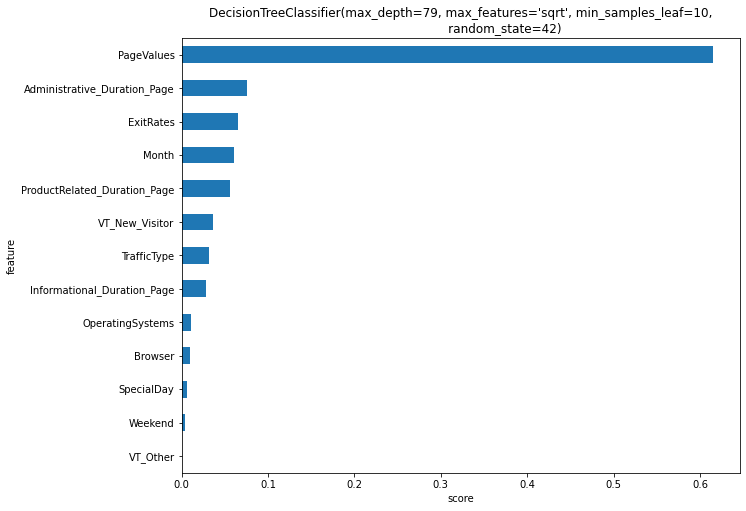

In [88]:
show_feature_importance(dt_tuned.best_estimator_)

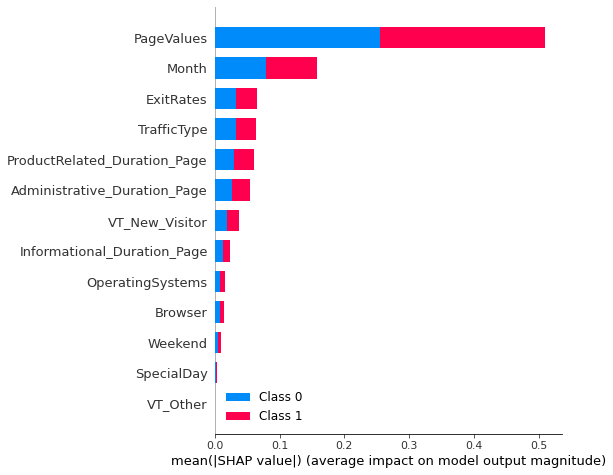

In [89]:
dt = DecisionTreeClassifier()
dt.fit(X_over_smote, y_over_smote)
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_over_smote, y_over_smote)
eval_classification(rf)

Accuracy (Train set): 1.00
Accuracy (Test set): 0.89
Precision (Train set):1.00
Precision (Test set):0.61
Recall (Train set):1.00
Recall (Test set):0.67
F1 (Train set):1.00
F1 (Test set):0.64
ROC AUC (Train-proba): 1.00
ROC AUC (Test-proba): 0.92


In [91]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [41, 42, 43, 44, 45] # Number of trees in random forest
criterion = ['gini', 'entropy'] # Number of criterion to consider at every split
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)] # Maximum number of levels in tree
min_samples_split = [17] # Minimum number of samples required to split a node
min_samples_leaf = [7] # Minimum number of samples required at each leaf node

hyperparameters = dict(n_estimators = n_estimators, criterion = criterion, 
                       max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

In [92]:
rf = RandomForestClassifier(random_state = 42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, scoring = 'precision', random_state = 42, cv = 5)
rf_tuned.fit(X_over_smote, y_over_smote)
eval_classification(rf_tuned)

Accuracy (Train set): 0.90
Accuracy (Test set): 0.88
Precision (Train set):0.65
Precision (Test set):0.58
Recall (Train set):0.80
Recall (Test set):0.76
F1 (Train set):0.72
F1 (Test set):0.66
ROC AUC (Train-proba): 0.95
ROC AUC (Test-proba): 0.93


In [93]:
rf_tuned.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 17,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 44,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

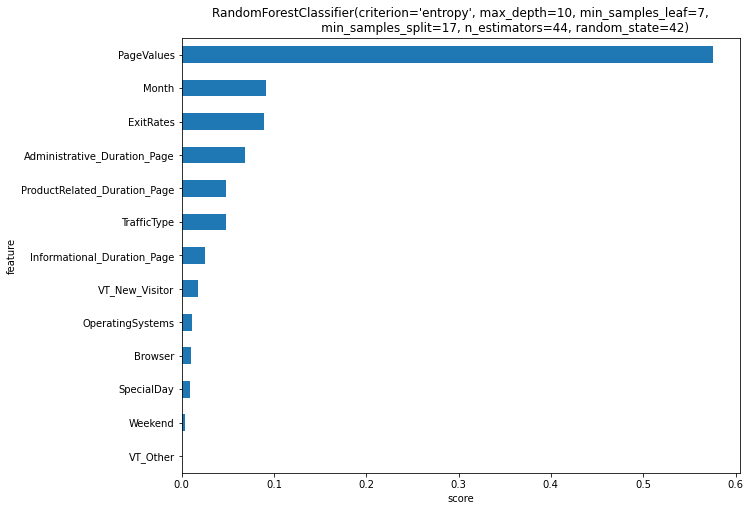

In [94]:
show_feature_importance(rf_tuned.best_estimator_)

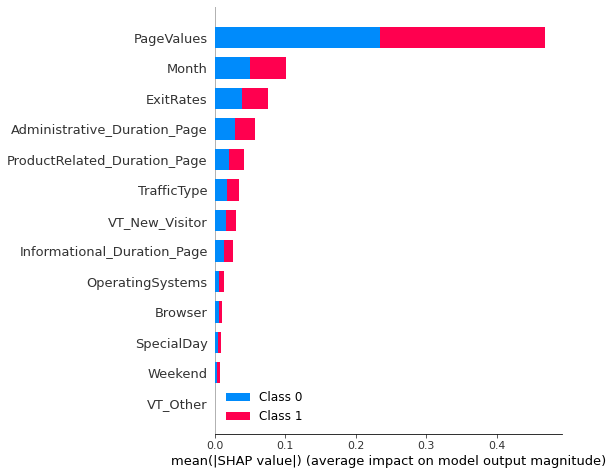

In [95]:
rf = RandomForestClassifier()
rf.fit(X_over_smote, y_over_smote)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_over_smote, y_over_smote)
eval_classification(ab)

Accuracy (Train set): 0.89
Accuracy (Test set): 0.88
Precision (Train set):0.63
Precision (Test set):0.60
Recall (Train set):0.69
Recall (Test set):0.67
F1 (Train set):0.66
F1 (Test set):0.63
ROC AUC (Train-proba): 0.92
ROC AUC (Test-proba): 0.91


In [97]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME.R']
                      )
# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state = 42, cv = 5, scoring = 'precision')
ab_tuned.fit(X_over_smote, y_over_smote)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Train set): 0.89
Accuracy (Test set): 0.89
Precision (Train set):0.62
Precision (Test set):0.60
Recall (Train set):0.72
Recall (Test set):0.71
F1 (Train set):0.67
F1 (Test set):0.65
ROC AUC (Train-proba): 0.92
ROC AUC (Test-proba): 0.92


In [98]:
ab_tuned.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.05423115577889447,
 'n_estimators': 825,
 'random_state': 42}

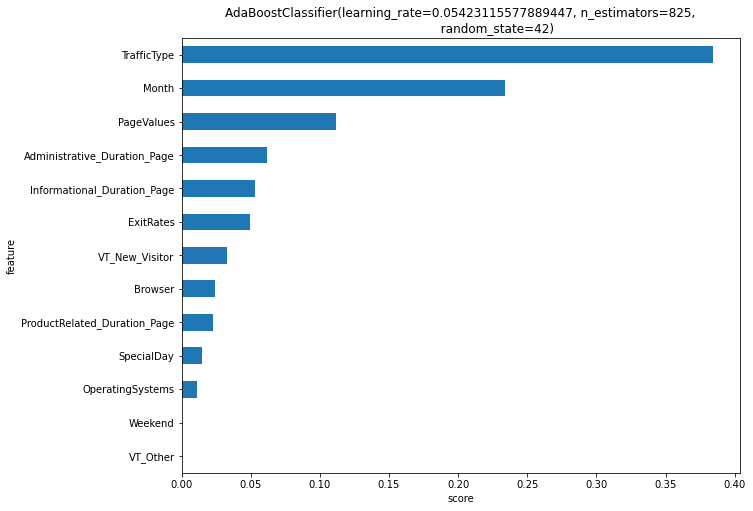

In [99]:
show_feature_importance(ab_tuned.best_estimator_)

<AxesSubplot:>

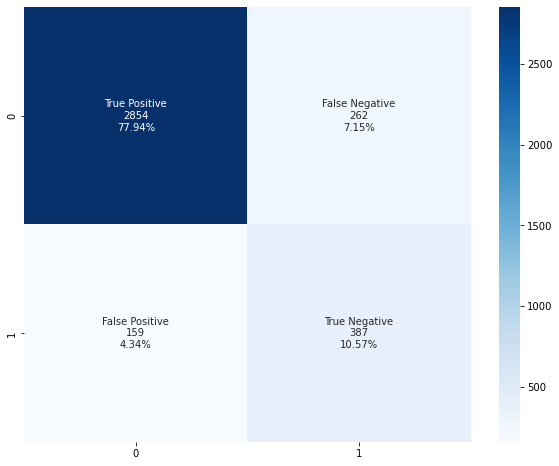

In [100]:
y_pred = ab_tuned.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### XGBoost

In [101]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_over_smote, y_over_smote)
eval_classification(xgb)

Accuracy (Train set): 0.98
Accuracy (Test set): 0.89
Precision (Train set):0.95
Precision (Test set):0.64
Recall (Train set):0.89
Recall (Test set):0.64
F1 (Train set):0.92
F1 (Test set):0.64
ROC AUC (Train-proba): 0.99
ROC AUC (Test-proba): 0.92


In [102]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 20, num = 10)],
                    'min_child_weight' : [int(x) for x in np.linspace(50, 100, num = 50)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    #'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 15)]
                    }
xgb = XGBClassifier(random_state = 42)
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv = 5, random_state = 42, scoring = 'precision')
xgb_tuned.fit(X_over_smote, y_over_smote)
eval_classification(xgb_tuned)

Accuracy (Train set): 0.93
Accuracy (Test set): 0.89
Precision (Train set):0.78
Precision (Test set):0.61
Recall (Train set):0.77
Recall (Test set):0.66
F1 (Train set):0.77
F1 (Test set):0.63
ROC AUC (Train-proba): 0.96
ROC AUC (Test-proba): 0.92


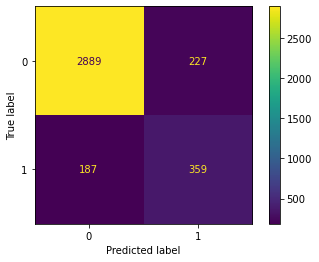

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

xgb = XGBClassifier(random_state = 42)
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv = 5, random_state = 42, scoring = 'precision')
xgb_tuned.fit(X_over_smote, y_over_smote)

predictions = xgb_tuned.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels = xgb_tuned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_tuned.classes_)
disp.plot()
plt.show()

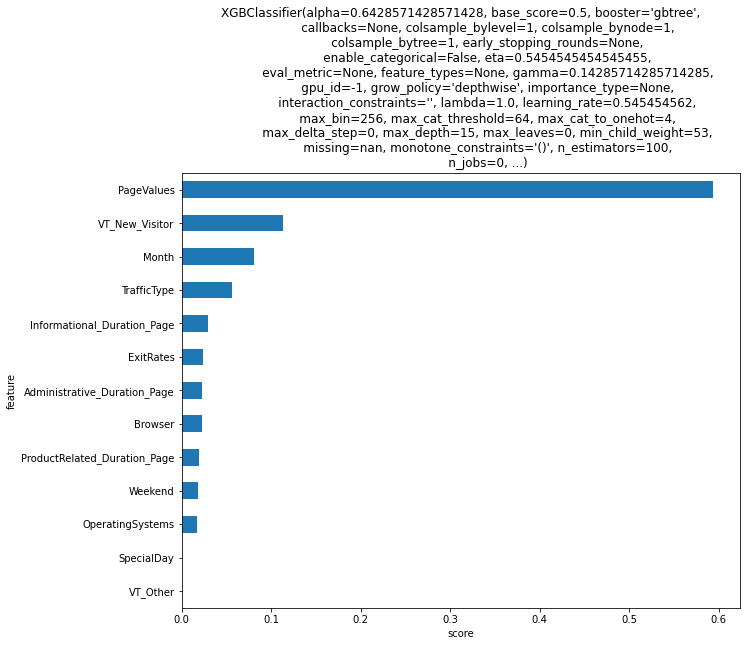

In [104]:
show_feature_importance(xgb_tuned.best_estimator_)

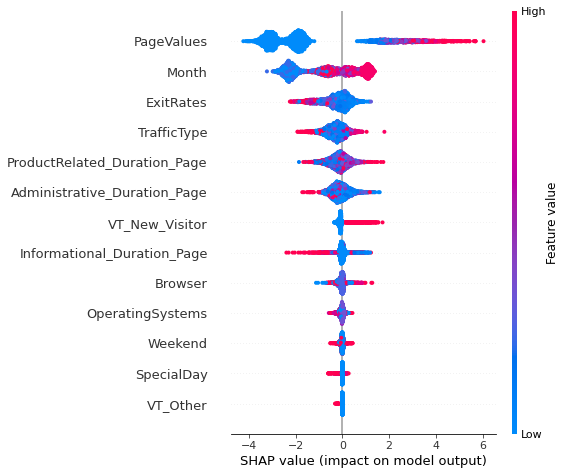

In [71]:
xgb = XGBClassifier()
xgb.fit(X_over_smote, y_over_smote)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)